In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy

In [8]:
path = r'Albuquerque Home Prices_data.txt'
data = pd.read_csv(path, sep = '\t')

In [10]:
data.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13,7,1,1,0,1639
1,2080,2600,-9999,4,1,1,0,1088
2,2150,2664,6,5,1,1,0,1193
3,2150,2921,3,6,1,1,0,1635
4,1999,2580,4,4,1,1,0,1732


In [22]:
mask = data['COR'] == 1
corner_houses = data[mask]
uncorner_houses = data[mask == False]
corner_houses.head()
uncorner_houses.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13,7,1,1,0,1639
1,2080,2600,-9999,4,1,1,0,1088
2,2150,2664,6,5,1,1,0,1193
3,2150,2921,3,6,1,1,0,1635
4,1999,2580,4,4,1,1,0,1732


In [11]:
def ruleOf3std(series : pd.Series):
    std = series.std()
    mean = series.mean()
    #range = [mean - 3*std, mean + 3*std] # not usable
    mask = series < (std * 3 + mean)
    return series[mask]

In [12]:
bins = 20
counts, bins = np.histogram(ruleOf3std(data['население']), bins=bins) # ruleOf3std - правило 3 сигм, убирает из вывода переменные, выходящие за рамки правила
plt.hist(bins[:-1], bins, weights=counts)
plt.grid(True)
plt.show()

KeyError: 'население'

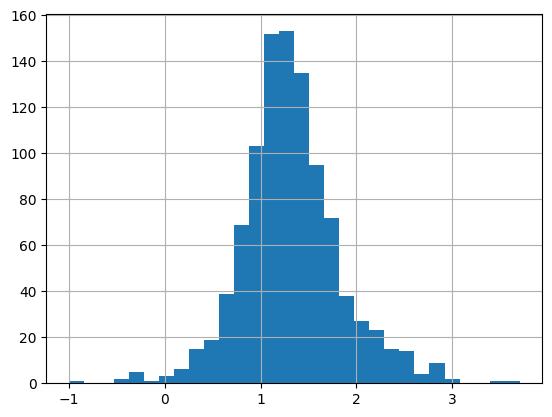

In [6]:
logarithmicData = np.log10(data['население'])
bins = 30
counts, bins = np.histogram(logarithmicData, bins=bins) # ruleOf3std - правило 3 сигм, убирает из вывода переменные, выходящие за рамки правила
plt.hist(bins[:-1], bins, weights=counts)
plt.grid(True)
plt.show()

In [7]:
logarithmicData.describe()

count    1004.000000
mean        1.319556
std         0.515877
min        -1.000000
25%         1.029384
50%         1.284429
75%         1.579495
max         3.702947
Name: население, dtype: float64

In [9]:
scipy.stats.shapiro(logarithmicData)

ShapiroResult(statistic=0.9746663570404053, pvalue=3.1486824866172602e-12)

### p-value меньше уровня значимости 0,05
## отклоняем гипотезу о нормальности прологарифмированной выборки